<a href="https://colab.research.google.com/github/cristinnebr/alura_imersao_dados/blob/main/tarefas_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
url = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
dados = pd.read_csv(url)

#Desafio Aula 2

- Criar uma escala de valores em milhões
- Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)
- Preço do metro quadrado por bairro e plotar em um gráfico ideal
- Explorar as bibliotecas de visualizações e colocar as suas conclusão
- Pesquisar um visualização para analisar os quartis, mediana e outliers



In [3]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
2730,"Rua Conselheiro Zacarias, 50",Jardim Paulista,São Paulo,580,4,4,3,R$ 9.000.000
1023,NaN,Jardim Guedala,São Paulo,542,4,4,6,R$ 2.250.000
5277,Rua Bastos Pereira,Moema,São Paulo,750,6,6,7,R$ 8.500.000
4178,Rua dos Parecis,Cambuci,São Paulo,238,3,2,1,R$ 750.000
9673,Rua Theodor Herzi,Perdizes,São Paulo,500,3,2,4,R$ 3.000.000
7951,NaN,Boaçava,São Paulo,949,6,7,6,R$ 8.000.000
74,Rua Caetano Braga,Conjunto Residencial José Bonifácio,São Paulo,129,3,2,2,R$ 490.000
4248,Rua Doutor Mário Freire,Retiro Morumbi,São Paulo,442,4,5,3,R$ 2.800.000
8114,"Rua Engenheiro Artur de Miranda, , 187",Butantã,São Paulo,180,3,2,3,R$ 900.000
8879,Rua Manguatá,Cidade Monções,São Paulo,196,4,5,4,R$ 1.600.000


In [4]:
# Converter string in float
dados['Valor'].str.split() # gera uma series com os elementos da separação

0          [R$, 7.000.000]
1          [R$, 3.700.000]
2            [R$, 380.000]
3            [R$, 685.000]
4            [R$, 540.000]
               ...        
10003        [R$, 665.000]
10004      [R$, 2.300.000]
10005      [R$, 1.050.000]
10006    [R$, 2.200, /Mês]
10007        [R$, 270.000]
Name: Valor, Length: 10008, dtype: object

In [5]:
dados['Valor'].str.split(expand = True) # cria um dataframe com os elementos da separação

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [6]:
# Mostra os valores únicos de uma coluna
dados['Valor'].str.split(expand = True)[0].unique() # [0] seleciona e primeira coluna

array(['R$'], dtype=object)

In [7]:
dados['Valor'].str.split(expand = True)[1].unique()

array(['7.000.000', '3.700.000', '380.000', ..., '553.000', '951.000',
       '2.200'], dtype=object)

In [8]:
# O método len() mostra quantos valores únicos há em uma coluna
len(dados['Valor'].str.split(expand = True)[1].unique())

1038

In [9]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [10]:
# Adicionando os elementos do split no dataset na colunas criadas Moeda, Valor_anuncio e Tipo_anuncio
dados[['Moeda', 'Valor_imovel', 'Tipo_anuncio']] = dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_imovel,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [11]:
# Eliminar os elementos que não são None na coluna Tipo_anuncio
# Verificar quais linhas que são None e quais não são
dados['Tipo_anuncio'].isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
10003     True
10004     True
10005     True
10006    False
10007     True
Name: Tipo_anuncio, Length: 10008, dtype: bool

In [12]:
# Criar um dataset apenas com os elementos com None
dados_venda = dados[dados['Tipo_anuncio'].isnull()]
dados_venda.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_imovel,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [13]:
dados_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rua           6107 non-null   object
 1   Bairro        9146 non-null   object
 2   Cidade        9156 non-null   object
 3   Metragem      9156 non-null   int64 
 4   Quartos       9156 non-null   int64 
 5   Banheiros     9156 non-null   int64 
 6   Vagas         9156 non-null   int64 
 7   Valor         9156 non-null   object
 8   Moeda         9156 non-null   object
 9   Valor_imovel  9156 non-null   object
 10  Tipo_anuncio  0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [14]:
# Converter string para float
# Eliminar o ponto
dados_venda['Valor_float'] = dados_venda['Valor_imovel'].str.replace('.','').astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
dados_venda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rua           6107 non-null   object 
 1   Bairro        9146 non-null   object 
 2   Cidade        9156 non-null   object 
 3   Metragem      9156 non-null   int64  
 4   Quartos       9156 non-null   int64  
 5   Banheiros     9156 non-null   int64  
 6   Vagas         9156 non-null   int64  
 7   Valor         9156 non-null   object 
 8   Moeda         9156 non-null   object 
 9   Valor_imovel  9156 non-null   object 
 10  Tipo_anuncio  0 non-null      object 
 11  Valor_float   9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


In [16]:
dados_venda.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_imovel,Tipo_anuncio,Valor_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.0
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,None,850000.0
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,None,450000.0
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900,R$,199.900,None,199900.0
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000,R$,585.000,None,585000.0


In [17]:
dados_venda['Valor_float'].describe()

count    9.156000e+03
mean     3.052203e+06
std      3.944208e+06
min      1.300000e+04
25%      8.900000e+05
50%      1.800000e+06
75%      3.500000e+06
max      6.500000e+07
Name: Valor_float, dtype: float64

In [18]:
# Transformar tudo em float
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

dados_venda.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_float
count,9156.00,9156.00,9156.00,9156.00,9156.00
mean,434.42,3.45,3.80,3.96,3052202.96
std,7856.42,1.05,1.97,2.60,3944208.19
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,750000.00,16.00,40.00,50.00,65000000.00


Tarefa 1: Criar uma escala de valores em milhões

In [19]:
dados_venda['Valor_milhao'] = dados_venda.Valor_float.apply(lambda v: v/(1000000))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
dados_venda.head(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_imovel,Tipo_anuncio,Valor_float,Valor_milhao
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.00,1.98
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,None,850000.00,0.85
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,None,450000.00,0.45
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900,R$,199.900,None,199900.00,0.20
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000,R$,585.000,None,585000.00,0.58


Tarefa 2: Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

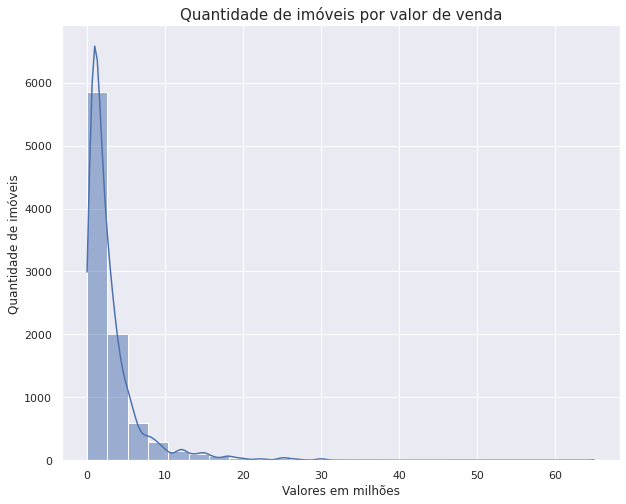

In [21]:
sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_venda, x= 'Valor_milhao', kde=True, bins=25)
ax.set_title('Quantidade de imóveis por valor de venda', fontsize = 15)
plt.ylabel('Quantidade de imóveis', fontsize = 12)
plt.xlabel('Valores em milhões', fontsize = 12)
plt.show()

Tarefa 3: Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [22]:
dados_venda['Preco_m2'] = (dados_venda['Valor_float'])/dados_venda['Metragem']
dados_venda.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_imovel,Tipo_anuncio,Valor_float,Valor_milhao,Preco_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,3.70,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,0.38,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,0.69,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,0.54,5400.00
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,R$,1.980.000,None,1980000.00,1.98,4500.00
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000,R$,850.000,None,850000.00,0.85,5862.07
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000,R$,450.000,None,450000.00,0.45,3000.00
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900,R$,199.900,None,199900.00,0.20,4164.58
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000,R$,585.000,None,585000.00,0.58,5131.58


In [23]:
from pandas.core.groupby import groupby
pm2_bairro = dados_venda[['Bairro', 'Preco_m2']].groupby('Bairro').mean().head(30).reset_index()
pm2_bairro.head(10)

,Bairro,Preco_m2
0,Aclimação,7656.17
1,Alto da Boa Vista,5849.57
2,Alto da Lapa,7606.73
3,Alto da Mooca,5691.74
4,Alto de Pinheiros,11269.98
5,Aricanduva,1726.62
6,Balneário Mar Paulista,3600.00
7,Barra Funda,6173.43
8,Barro Branco (Zona Norte),6146.31
9,Bela Aliança,7233.55


In [24]:
type(pm2_bairro)

pandas.core.frame.DataFrame

In [25]:
top_bm = pm2_bairro.sort_values(by='Preco_m2', ascending=False)
top_bm

,Bairro,Preco_m2
18,Brooklin Novo,12343.15
4,Alto de Pinheiros,11269.98
12,Boaçava,9712.55
17,Brooklin,7893.87
0,Aclimação,7656.17
2,Alto da Lapa,7606.73
19,Brooklin Paulista,7264.92
9,Bela Aliança,7233.55
25,Campo Belo,7176.03
22,Butantã,6743.33


Text(0, 0.5, 'Valor do metro quadrado - valores em R$')

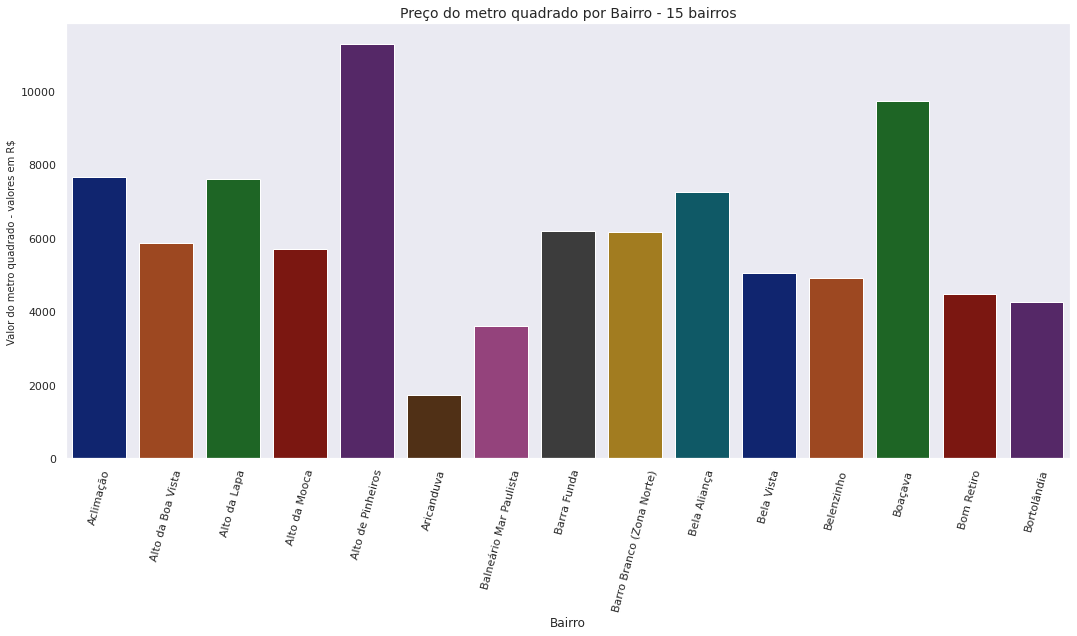

In [26]:
sns.set(style = 'dark')
plt.figure(figsize=(18,8))
bp = sns.barplot(x="Bairro", y="Preco_m2", data=pm2_bairro.head(15), palette = 'dark')
bp.set_xticklabels(bp.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro - 15 bairros', fontsize=14)
plt.ylabel('Valor do metro quadrado - valores em R$', fontsize=10)




Tarefa 4: Explorar as bibliotecas de visualizações e colocar as suas conclusão


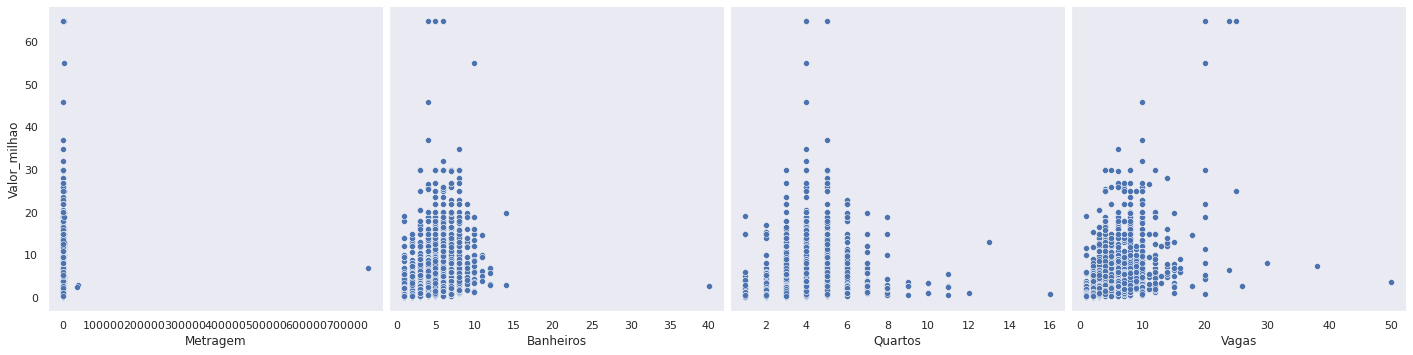

In [27]:
sns.pairplot(dados_venda,  y_vars='Valor_milhao', x_vars=['Metragem', 'Banheiros', 'Quartos', 'Vagas'], height=5)

Tarefa 5: Pesquisar um visualização para analisar os quartis, mediana e outliers

No handles with labels found to put in legend.


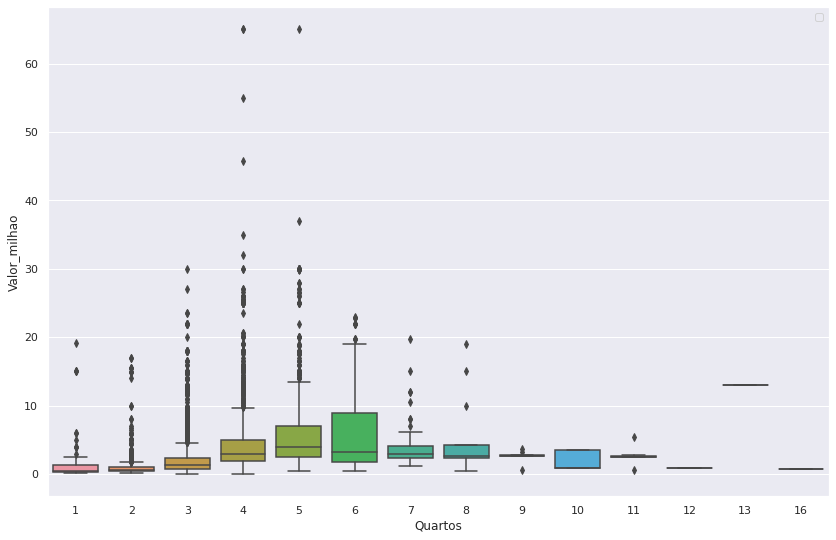

In [28]:
plt.figure(figsize=(14,9))
sns.set(style = "darkgrid")
sns.boxplot(x='Quartos',
            y='Valor_milhao',
            data=dados_venda)
plt.legend(loc=0)